In [1]:
push!(LOAD_PATH, "../src/")
using Setup
using ODESolvers
using Output

┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/ODESolvers.ji for ODESolvers [top-level]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/Output.ji for Output [top-level]
└ @ Base loading.jl:1184


In [2]:
include("../src/PhysicalConstants.jl");

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

# Cooling

In [4]:
model, core, env, var = setup("../src/sample.ini")
sol = cooling(model, core, env, var);

In [5]:
model, core, env, var = setup("../src/sample2.ini")
t2, u2 = cooling(model, core, env, var);

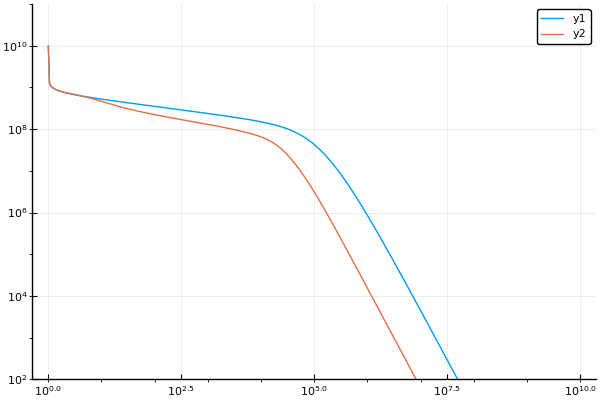

In [6]:
t, u = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t2, u2, scale=:log10, yscale=:log10)
ylims!(1e2,1e11)

# Heating

In [7]:
model, core, env, var = setup("../src/sample.ini")
sol = heating(model, core, env, var);

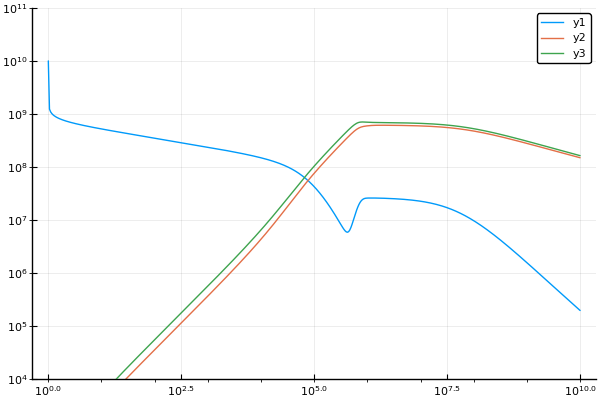

In [8]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)

In [4]:
model, core, env, var = setup("../src/sample2.ini")
sol = heating(model, core, env, var);

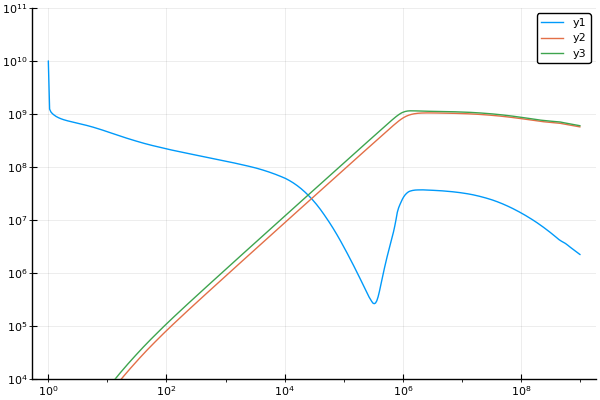

In [5]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)

# Check output module

In [6]:
output_T(sol, model, core, env, var)
output_LC(sol, model, core, env, var)
write_ini(sol, model)

In [7]:
model, core, env, var = setup("../src/test/sample2.ini")
sol = heating(model, core, env, var);

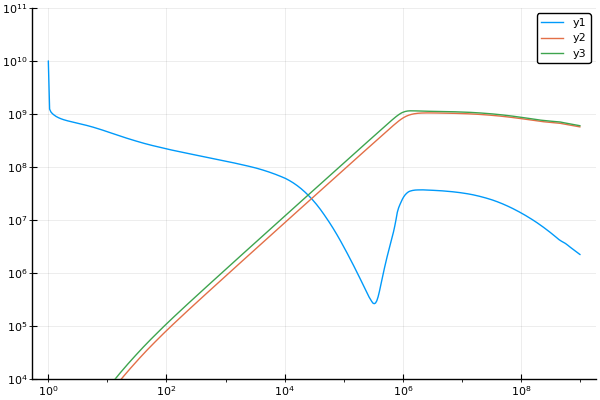

In [8]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)